Import thư viện sử dụng

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import f1_score, precision_score, recall_score

Khai phá dữ liệu

In [64]:
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [65]:
# kiểm tra dữ liệu có bị thiếu không
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Thống kê mô tả

In [66]:
data.describe().applymap(lambda x: f'{x:.2f}')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3620\1253165006.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data.describe().applymap(lambda x: f'{x:.2f}')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


In [67]:
# thống kê output
data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

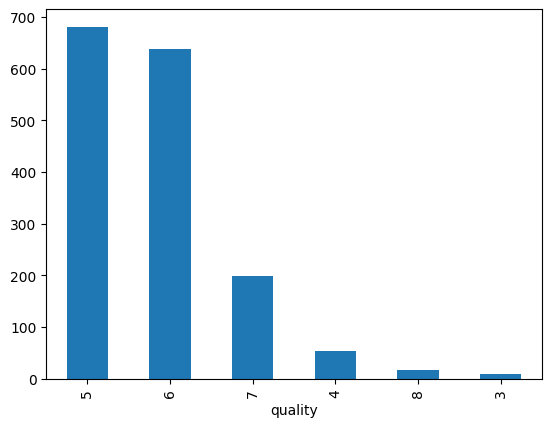

In [68]:
# vẽ barchart matplotlib
data['quality'].value_counts().plot(kind='bar')
plt.show()

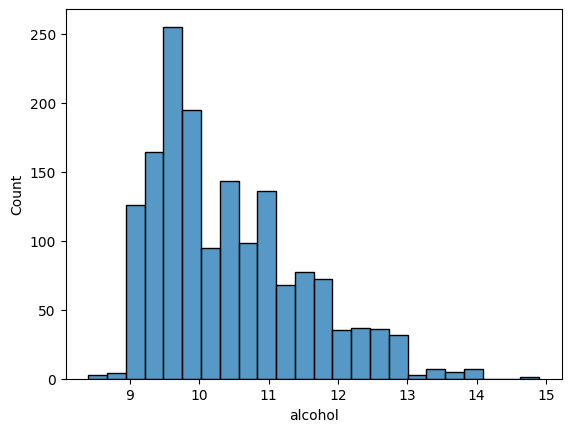

In [69]:
# vẽ đồ thị cho alcohol
sns.histplot(data['alcohol'])
plt.show()

In [70]:
# thống kê cho alcohol
data['alcohol'].describe()

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

In [71]:
# nồng độ cồn chủ yếu tập trung ở khu:
data['alcohol'].mode()
# đếm số mẫu có nồng độ cồn 9.5
data[data['alcohol'] == 9.5].shape[0]

139

<Axes: >

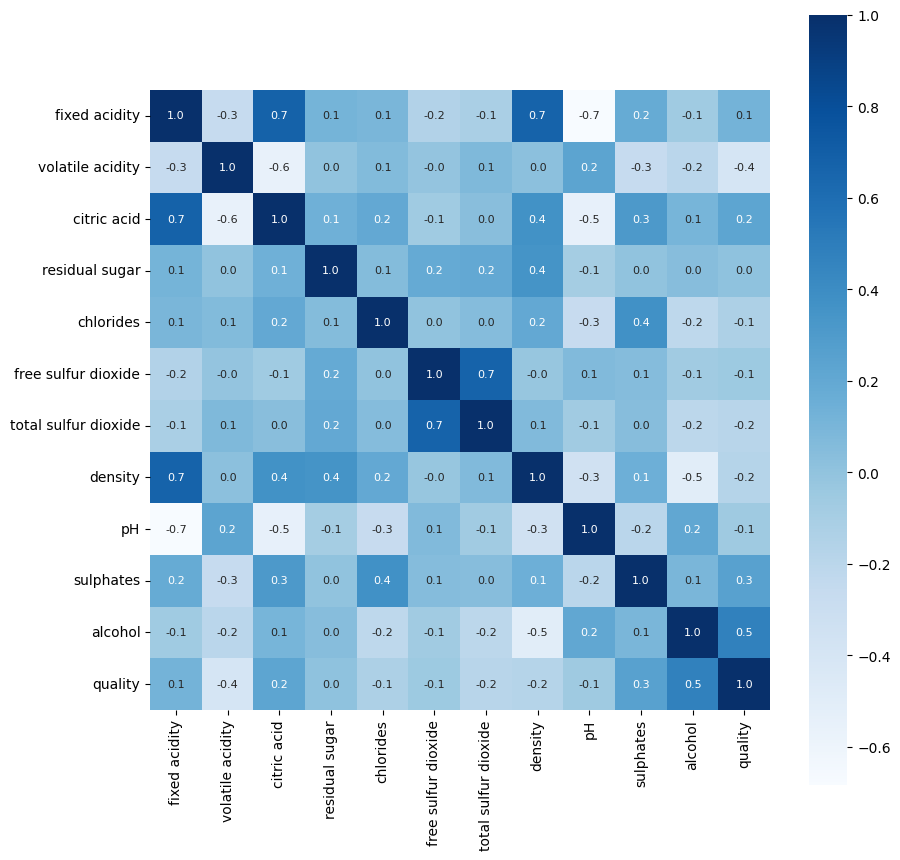

In [72]:
# kiểm tra độ tương quan giữa các cột
correlation = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3620\3698520561.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])


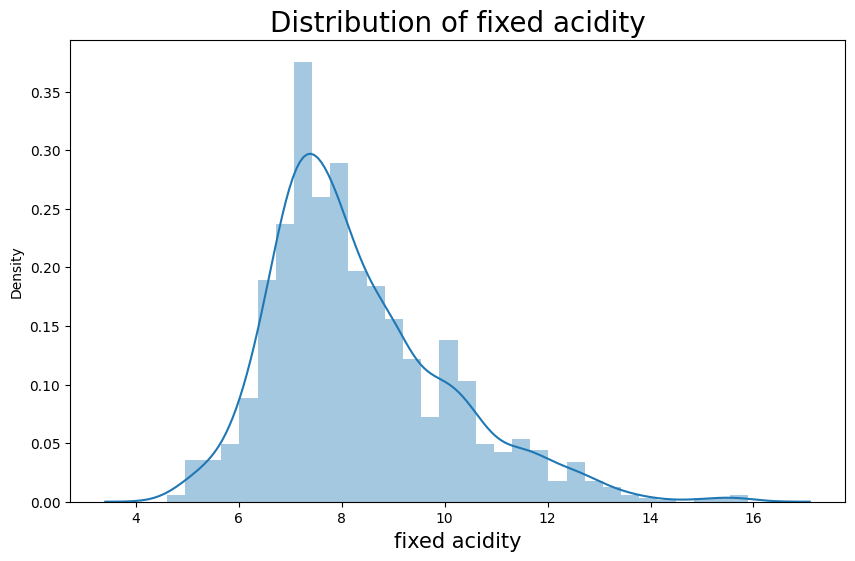

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3620\3698520561.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])


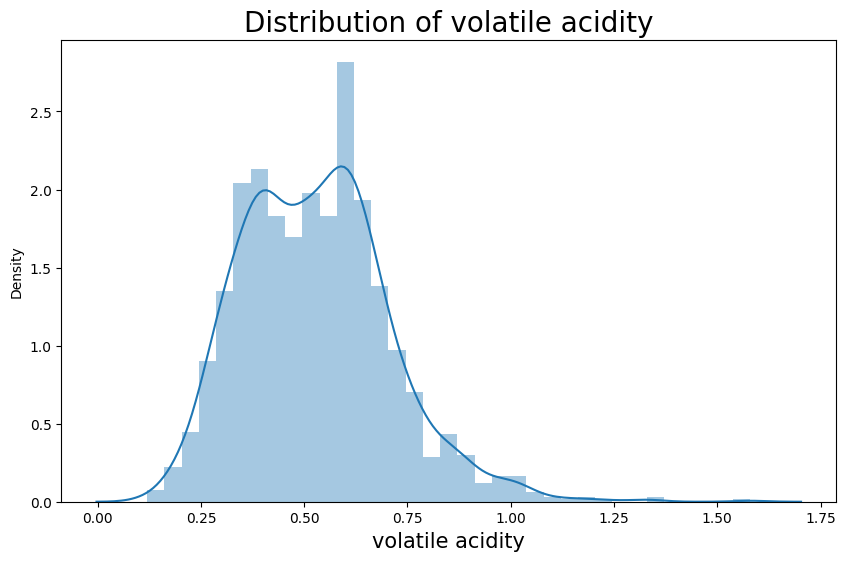

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3620\3698520561.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])


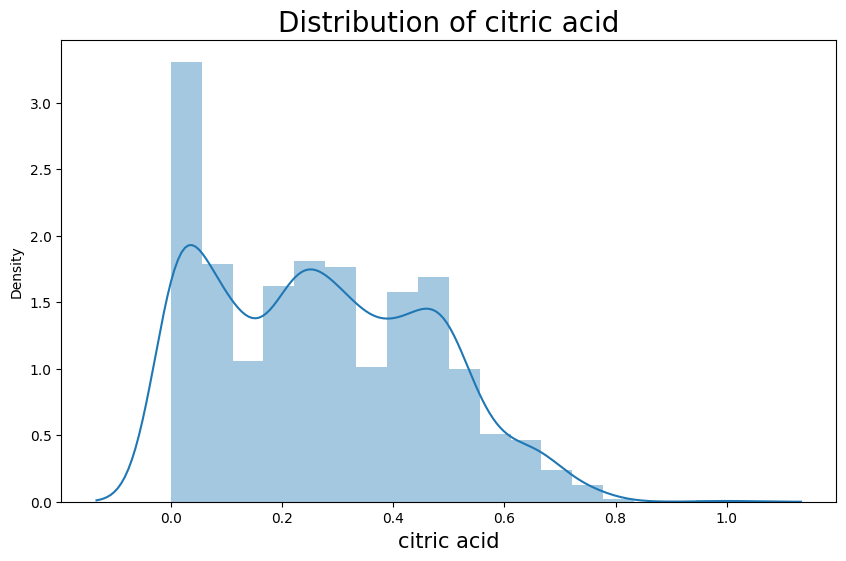

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3620\3698520561.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])


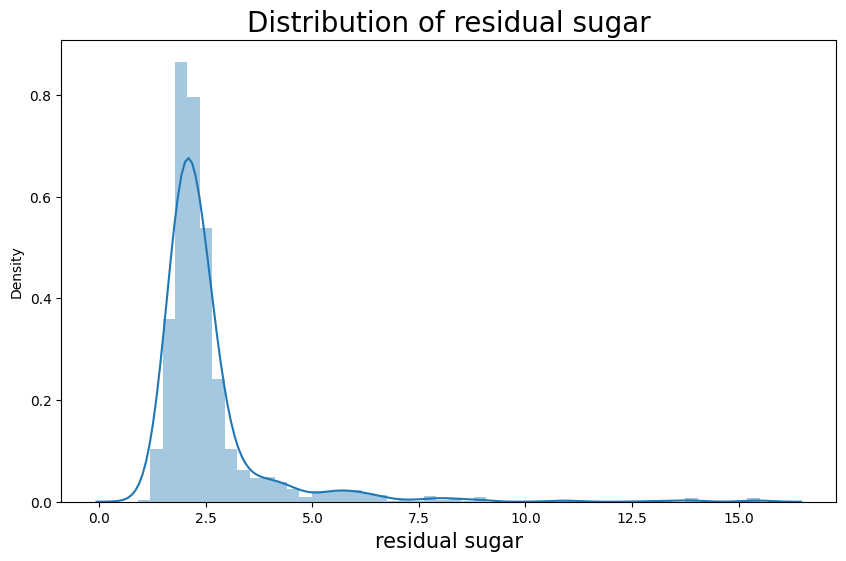

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3620\3698520561.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])


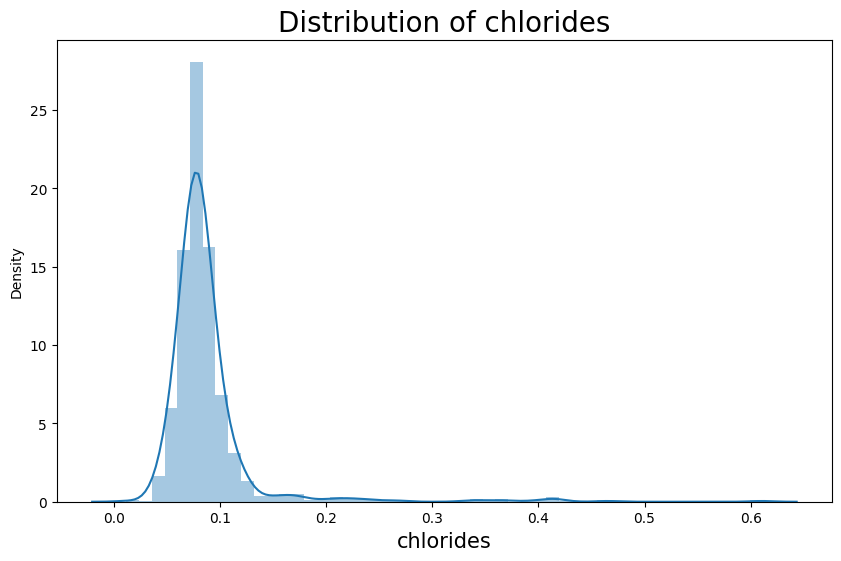

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3620\3698520561.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])


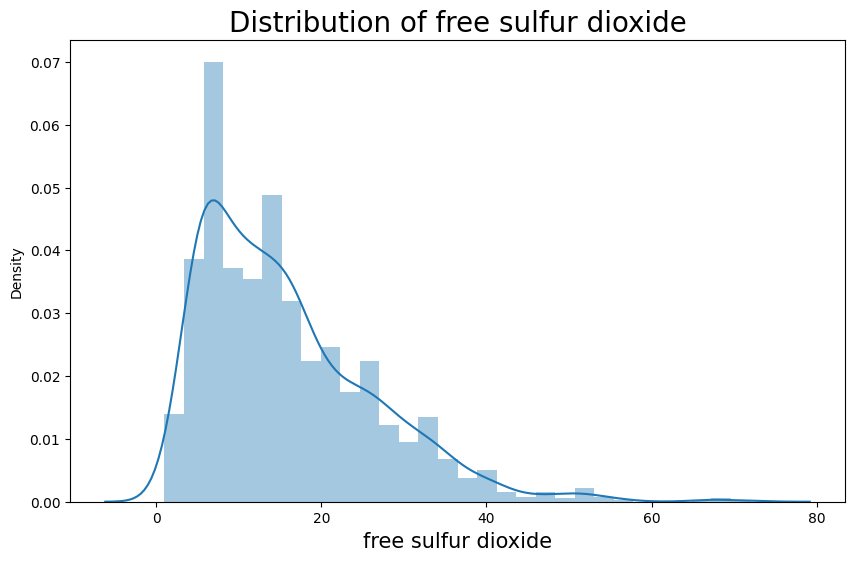

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3620\3698520561.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])


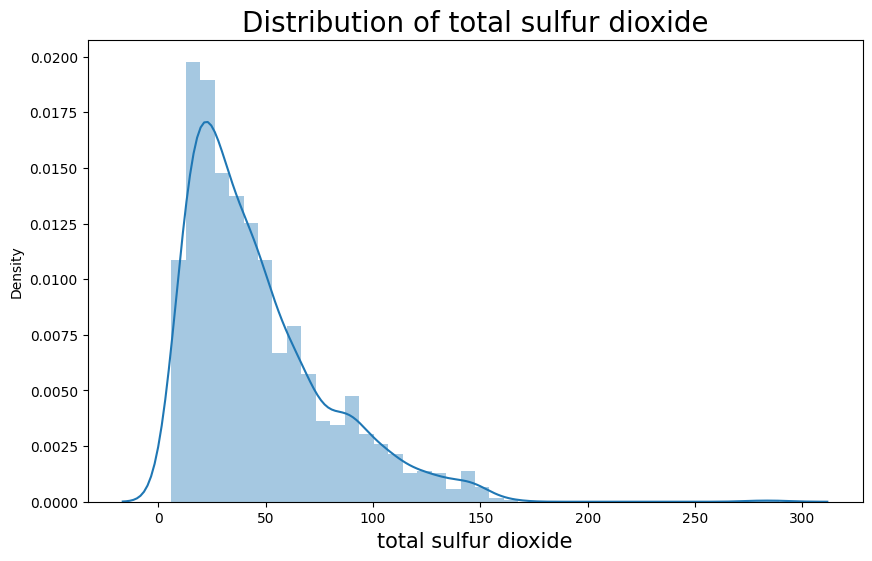

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3620\3698520561.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])


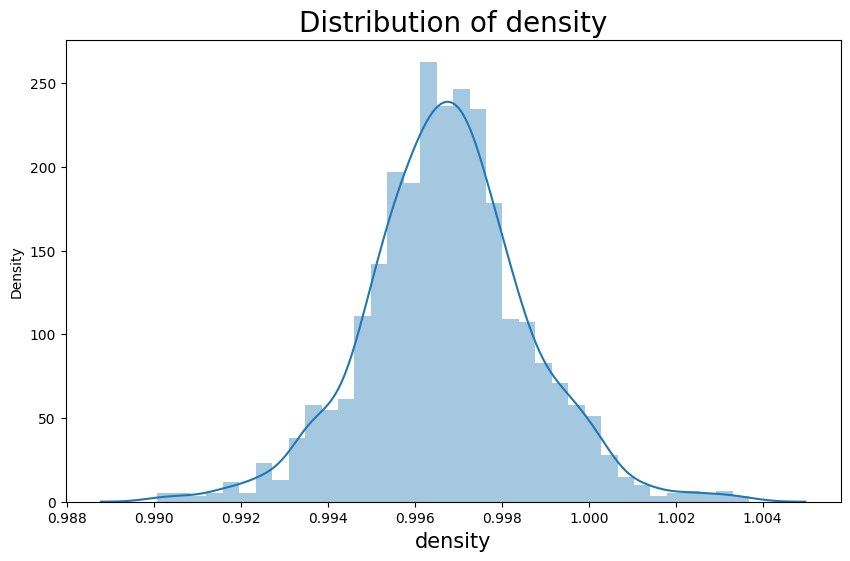

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3620\3698520561.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])


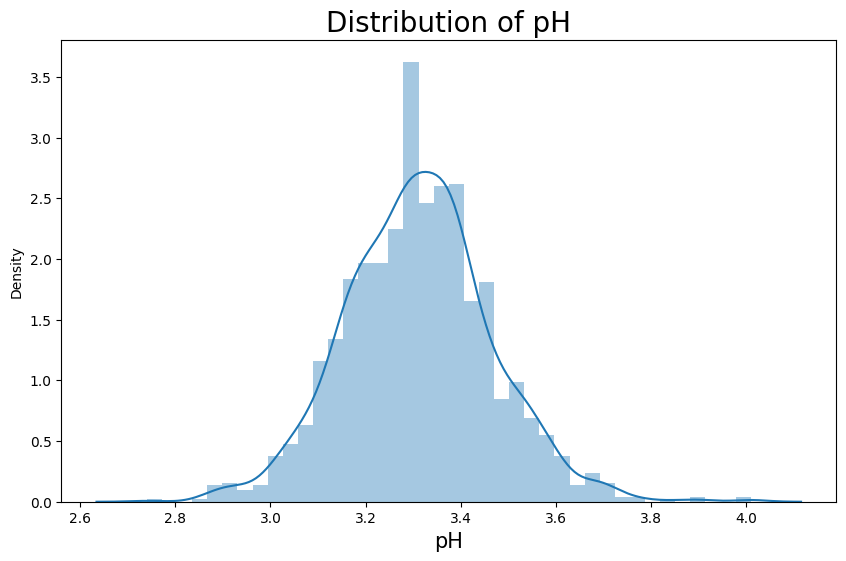

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3620\3698520561.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])


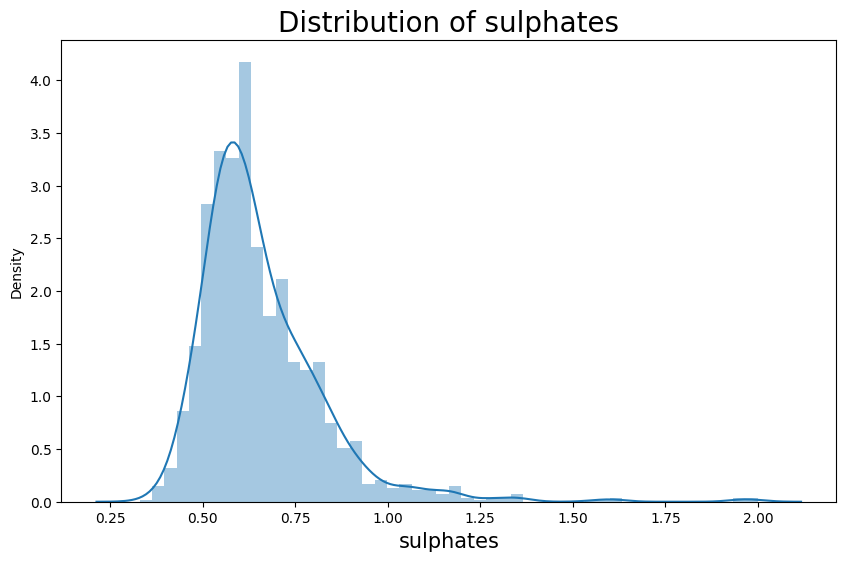

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3620\3698520561.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])


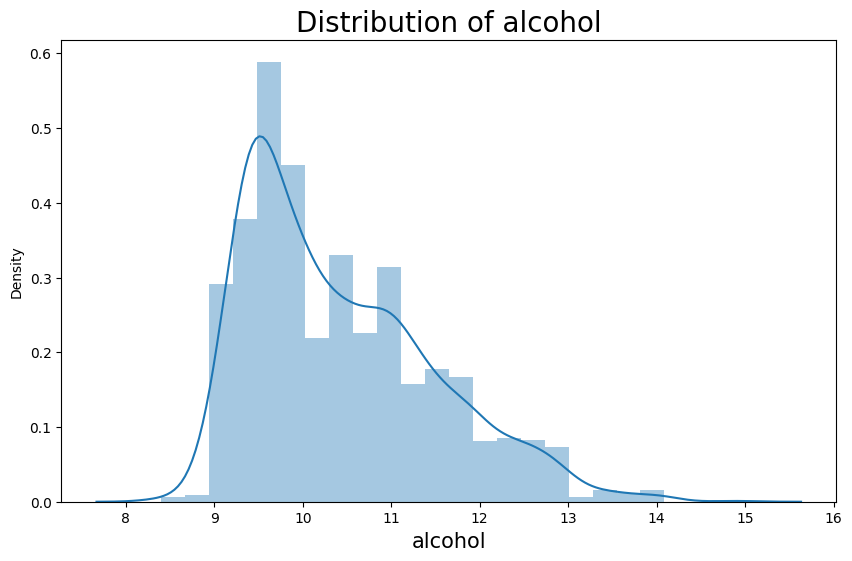

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3620\3698520561.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])


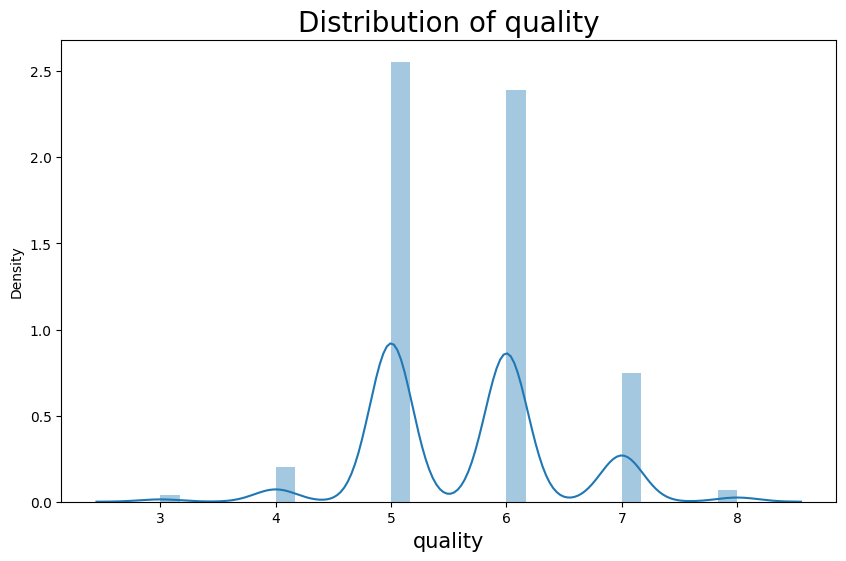

In [73]:
for column in data.columns:
    plt.figure(figsize=(10, 6))
    sns.distplot(data[column])
    plt.xlabel(column, fontsize=15)
    plt.title(f'Distribution of {column}', fontsize=20)
    plt.show()


![Công thức cách tạo thêm feature dựa trên công thức vật lý](feature.png)

In [74]:
# feature engineering theo công thức vật lý
# Tạo Tổng Axit
data['total_acidity'] = data['fixed acidity'] + data['volatile acidity']

# Tạo Tỷ Lệ Axit Cố Định trên Axit Bay
data['acid_ratio'] = data['fixed acidity'] / data['volatile acidity']

# Tạo Tỷ Lệ Đường Phụ Trên Axit Tổng
data['sugar_to_acidity_ratio'] = data['residual sugar'] / data['total_acidity']

# Tạo Tỷ Lệ Sulfur Độc Tự Do trên Tổng Sulfur Độc
data['free_sulfur_dioxide_ratio'] = data['free sulfur dioxide'] / data['total sulfur dioxide']

# Tạo Mật Độ So Với pH
data['density_to_pH'] = data['density'] / data['pH']

# Tạo đặc trưng tương tác giữa Alcohol và pH
data['alcohol_pH_interaction'] = data['alcohol'] * data['pH']

# Tạo đặc trưng tương tác giữa Sulphates và Alcohol
data['sulphates_alcohol_interaction'] = data['sulphates'] * data['alcohol']

In [75]:
# Hiển thị các đặc trưng mới
print("\nDữ liệu sau khi thêm các đặc trưng mới:")
print(data[['total_acidity', 'acid_ratio', 'sugar_to_acidity_ratio', 
           'free_sulfur_dioxide_ratio', 'density_to_pH', 
           'alcohol_pH_interaction', 'sulphates_alcohol_interaction']].head())  


Dữ liệu sau khi thêm các đặc trưng mới:
   total_acidity  acid_ratio  sugar_to_acidity_ratio  \
0           8.10   10.571429                0.234568   
1           8.68    8.863636                0.299539   
2           8.56   10.263158                0.268692   
3          11.48   40.000000                0.165505   
4           8.10   10.571429                0.234568   

   free_sulfur_dioxide_ratio  density_to_pH  alcohol_pH_interaction  \
0                   0.323529       0.284274                  32.994   
1                   0.373134       0.311500                  31.360   
2                   0.277778       0.305828                  31.948   
3                   0.283333       0.315823                  30.968   
4                   0.323529       0.284274                  32.994   

   sulphates_alcohol_interaction  
0                          5.264  
1                          6.664  
2                          6.370  
3                          5.684  
4                   

In [76]:
# Khởi tạo StandardScaler
scaler = StandardScaler()

Nói một chút về StandardScaler:
- StandardScaler chuyển đổi dữ liệu sao cho mean của dữ liệu là 0 và phương sai là 1.
- StandardScaler giúp giảm ảnh hưởng của các giá trị ngoại lệ.
- StandardScaler giúp cải thiện hiệu suất của mô hình.

![Công thức của Stander Scaler](StanderScaler.png)

Lợi Ích Của Việc Sử Dụng StandardScaler

Đưa Các Đặc Trưng Về Cùng Một Thang Đo: Khi các đặc trưng có các đơn vị hoặc thang đo khác nhau, một số đặc trưng có thể chiếm ưu thế trong quá trình huấn luyện mô hình. Việc chuẩn hóa giúp đảm bảo rằng tất cả các đặc trưng đều đóng góp một cách công bằng.

Giảm Ảnh Hưởng Của Giá Trị Ngoại Lai: Chuẩn hóa dữ liệu giúp giảm sự ảnh hưởng của các giá trị ngoại lai (outliers), từ đó giúp mô hình học được các mẫu chính xác hơn.

In [77]:
# Ví dụ:
import pandas as pd

# Tạo DataFrame mẫu
data_test_standard = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [100, 200, 300, 400, 500],
    'feature3': [0.2, 0.6, 0.8, 2, 3]
})

print("Trước khi chuẩn hóa:")
print(data_test_standard)

Trước khi chuẩn hóa:
   feature1  feature2  feature3
0         1       100       0.2
1         2       200       0.6
2         3       300       0.8
3         4       400       2.0
4         5       500       3.0


Nhận xét:

Nếu bạn không chuẩn hóa dữ liệu, mô hình học máy sẽ bị ảnh hưởng nhiều bởi Cột 2 do giá trị của nó lớn hơn nhiều so với Cột 1.

Điều này có thể dẫn đến việc mô hình không học được đúng mối quan hệ giữa các đặc trưng và mục tiêu.

In [78]:
from sklearn.preprocessing import StandardScaler

# Khởi tạo StandardScaler
scaler_test = StandardScaler()

# Áp dụng StandardScaler lên dữ liệu
data_scaled = data_test_standard.copy()
data_scaled[['feature1', 'feature2','feature3']] = scaler_test.fit_transform(data_test_standard[['feature1', 'feature2','feature3']])

print("\nSau khi chuẩn hóa:")
print(data_scaled)


Sau khi chuẩn hóa:
   feature1  feature2  feature3
0 -1.414214 -1.414214 -1.084978
1 -0.707107 -0.707107 -0.697486
2  0.000000  0.000000 -0.503740
3  0.707107  0.707107  0.658737
4  1.414214  1.414214  1.627467


Sau khi chuẩn hóa, cả hai đặc trưng đều có trung bình bằng 0 và độ lệch chuẩn bằng 1, giúp mô hình học máy không bị chi phối bởi thang đo lớn hơn.

In [79]:
# Chọn các đặc trưng cần chuẩn hóa
features_to_scale = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol', 'total_acidity', 'acid_ratio',
    'sugar_to_acidity_ratio', 'free_sulfur_dioxide_ratio', 'density_to_pH',
    'alcohol_pH_interaction', 'sulphates_alcohol_interaction'
]

# Áp dụng chuẩn hóa
data_scaled = data.copy()
data_scaled[features_to_scale] = scaler.fit_transform(data_scaled[features_to_scale])

# Hiển thị dữ liệu sau khi chuẩn hóa
print("\nDữ liệu sau khi chuẩn hóa:")
print(data_scaled.head())


Dữ liệu sau khi chuẩn hóa:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol  quality  total_

In [80]:
# Tính ma trận tương quan
corr_matrix = data_scaled.corr()

# Lấy các hệ số tương quan với 'quality' được sắp xếp theo thứ tự giảm dần
quality_corr = abs(corr_matrix['quality']).sort_values(ascending=False)

# Hiển thị các đặc trưng có tương quan cao với 'quality'
print("\nCác đặc trưng có tương quan cao với 'quality':")
print(quality_corr)


Các đặc trưng có tương quan cao với 'quality':
quality                          1.000000
alcohol                          0.476166
sulphates_alcohol_interaction    0.412858
volatile acidity                 0.390558
alcohol_pH_interaction           0.376588
acid_ratio                       0.343463
sulphates                        0.251397
citric acid                      0.226373
free_sulfur_dioxide_ratio        0.194113
total sulfur dioxide             0.185100
density                          0.174919
chlorides                        0.128907
fixed acidity                    0.124052
total_acidity                    0.085709
pH                               0.057731
free sulfur dioxide              0.050656
density_to_pH                    0.049531
sugar_to_acidity_ratio           0.014880
residual sugar                   0.013732
Name: quality, dtype: float64


<Axes: >

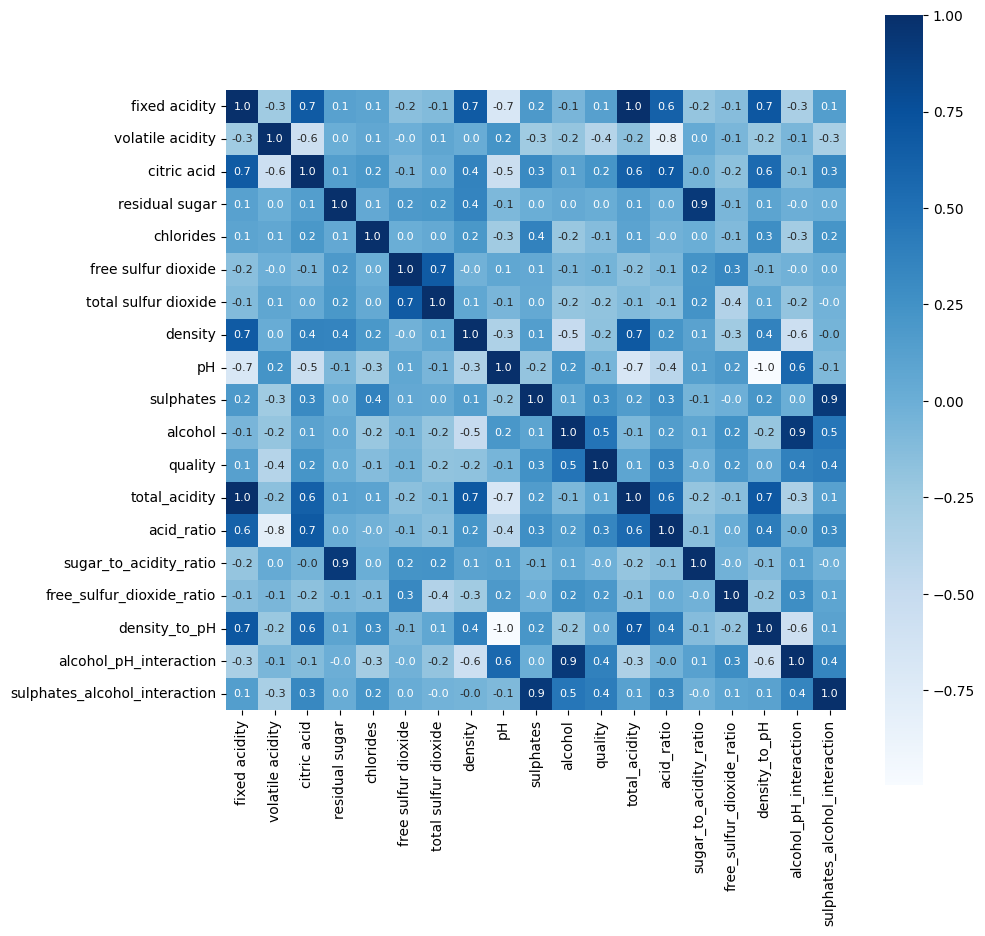

In [81]:
# new heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [82]:
all_features = data_scaled.drop('quality', axis=1)
all_features = all_features.columns
print(all_features)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'total_acidity', 'acid_ratio',
       'sugar_to_acidity_ratio', 'free_sulfur_dioxide_ratio', 'density_to_pH',
       'alcohol_pH_interaction', 'sulphates_alcohol_interaction'],
      dtype='object')


Chọn các feature sử dụng và đưa dữ liệu về 2 tập X và Y, với Y là cột label

In [83]:
# Chọn các đặc trưng sau feature engineering
all_features = data_scaled.drop([
    'density_to_pH', 
    'sugar_to_acidity_ratio', 
    'residual sugar',
    'total_acidity',
    'fixed acidity',
    'chlorides',
    'free sulfur dioxide',
    'pH'
], axis=1)

X = all_features
y = data_scaled['quality']

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (1599, 11)
y shape: (1599,)


Tiếp tục chia dữ liệu thành bộ validation và bộ sử dụng để tách làm train và test

In [84]:
# Chia dữ liệu thành tập huấn luyện (X_use, y_use) và tập validation (X_validation, y_validation)
# Giả sử dữ liệu đã được sắp xếp theo thứ tự nào đó, nếu không thì bạn nên shuffling trước khi chia
X_use = X.iloc[:1300]
y_use = y.iloc[:1300]

X_validation = X.iloc[1300:]
y_validation = y.iloc[1300:]

print(f'X_use shape: {X_use.shape}')
print(f'y_use shape: {y_use.shape}')
print(f'X_validation shape: {X_validation.shape}')
print(f'y_validation shape: {y_validation.shape}')


X_use shape: (1300, 11)
y_use shape: (1300,)
X_validation shape: (299, 11)
y_validation shape: (299,)


Khởi tạo mô hình

In [85]:
# khởi tạo DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [86]:
# Tạo k-fold cross-validation với k = 5 trên tập huấn luyện
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [87]:
# Lưu trữ các kết quả trong mỗi lần lặp
accuracy_train_scores = []
accuracy_test_scores = []
f1_scores = []
precision_scores = []
recall_scores = []

# Lặp qua mỗi fold trên tập huấn luyện (X_use, y_use)
fold_number = 1
for train_index, test_index in kf.split(X_use):
    X_train_fold, X_test_fold = X_use.iloc[train_index], X_use.iloc[test_index]
    y_train_fold, y_test_fold = y_use.iloc[train_index], y_use.iloc[test_index]

    # Huấn luyện mô hình
    classifier.fit(X_train_fold, y_train_fold)

    # Đánh giá trên tập huấn luyện và tập kiểm tra trong fold này
    accuracy_train = classifier.score(X_train_fold, y_train_fold)
    accuracy_test = classifier.score(X_test_fold, y_test_fold)
    accuracy_train_scores.append(accuracy_train)
    accuracy_test_scores.append(accuracy_test)

    # Dự đoán trên tập kiểm tra của fold này
    y_pred_fold = classifier.predict(X_test_fold)

    # Tính các chỉ số đánh giá
    f1 = f1_score(y_test_fold, y_pred_fold, average='micro')
    precision = precision_score(y_test_fold, y_pred_fold, average='micro')
    recall = recall_score(y_test_fold, y_pred_fold, average='micro')

    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)

# Tính trung bình và hiển thị kết quả k-fold
print("===== K-Fold Cross-Validation Tổng Quan =====")
print(f"Độ chính xác trung bình trên tập huấn luyện: {np.mean(accuracy_train_scores):.2f}")
print(f"Độ chính xác trung bình trên tập kiểm tra: {np.mean(accuracy_test_scores):.2f}")
print(f"F1 score trung bình: {np.mean(f1_scores):.2f}")
print(f"Precision trung bình: {np.mean(precision_scores):.2f}")
print(f"Recall trung bình: {np.mean(recall_scores):.2f}")

# Huấn luyện mô hình cuối trên toàn bộ tập huấn luyện
final_classifier = DecisionTreeClassifier(random_state=42)
final_classifier.fit(X_use, y_use)

# Đánh giá trên tập validation
validation_accuracy = final_classifier.score(X_validation, y_validation)
validation_f1 = f1_score(y_validation, final_classifier.predict(X_validation), average='micro')
validation_precision = precision_score(y_validation, final_classifier.predict(X_validation), average='micro')
validation_recall = recall_score(y_validation, final_classifier.predict(X_validation), average='micro')

print("\n===== Đánh giá trên Tập Validation =====")
print(f"Độ chính xác trên tập validation: {validation_accuracy:.2f}")
print(f"F1 score trên tập validation: {validation_f1:.2f}")
print(f"Precision trên tập validation: {validation_precision:.2f}")
print(f"Recall trên tập validation: {validation_recall:.2f}")

# Kiểm tra bằng một vài trường hợp ngẫu nhiên trên tập validation
test_data_validation = X_validation.sample(20, random_state=42)
test_label_validation = y_validation.loc[test_data_validation.index]
val_pred_validation = final_classifier.predict(test_data_validation)

# Tạo DataFrame để hiển thị kết quả
result_df_validation = pd.DataFrame({
    'Dự đoán chất lượng rượu': val_pred_validation,
    'Chất lượng rượu thực tế': test_label_validation
})

# Hiển thị kết quả
print("\nKết quả dự đoán trên tập validation:")
print(result_df_validation)

print(f"\nDự đoán chính xác { (test_label_validation == val_pred_validation).sum() } trên tổng số { len(test_label_validation) } mẫu.")

===== K-Fold Cross-Validation Tổng Quan =====
Độ chính xác trung bình trên tập huấn luyện: 1.00
Độ chính xác trung bình trên tập kiểm tra: 1.00
F1 score trung bình: 1.00
Precision trung bình: 1.00
Recall trung bình: 1.00

===== Đánh giá trên Tập Validation =====
Độ chính xác trên tập validation: 1.00
F1 score trên tập validation: 1.00
Precision trên tập validation: 1.00
Recall trên tập validation: 1.00

Kết quả dự đoán trên tập validation:
      Dự đoán chất lượng rượu  Chất lượng rượu thực tế
1581                        5                        5
1565                        6                        6
1464                        5                        5
1309                        5                        5
1377                        6                        6
1578                        6                        6
1393                        5                        5
1409                        6                        6
1305                        5                        5
1473  

Dưới đây là code mà tôi không sử dụng kĩ thuật feature engineering và chuẩn hóa input

In [91]:
data = pd.read_csv('winequality-red.csv')
X = data.drop('quality', axis=1)
y = data['quality']

# Chia dữ liệu thành tập huấn luyện và tập validation
X_train_full, X_validation, y_train_full, y_validation = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Tạo k-fold cross-validation với k = 5
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lưu trữ các kết quả trong mỗi lần lặp
accuracy_train_scores = []
accuracy_test_scores = []
f1_scores = []
precision_scores = []
recall_scores = []

# Lặp qua mỗi fold trên tập huấn luyện đầy đủ
for fold, (train_index, test_index) in enumerate(kf.split(X_train_full), 1):
    X_train, X_test = X_train_full.iloc[train_index], X_train_full.iloc[test_index]
    y_train, y_test = y_train_full.iloc[train_index], y_train_full.iloc[test_index]

    # Khởi tạo lại mô hình
    classifier = DecisionTreeClassifier(random_state=42)

    # Huấn luyện mô hình
    classifier.fit(X_train, y_train)

    # Đánh giá trên tập huấn luyện và tập kiểm tra
    accuracy_train = classifier.score(X_train, y_train)
    accuracy_test = classifier.score(X_test, y_test)
    accuracy_train_scores.append(accuracy_train)
    accuracy_test_scores.append(accuracy_test)

    # Dự đoán trên tập kiểm tra
    y_pred = classifier.predict(X_test)

    # Tính các chỉ số đánh giá
    f1 = f1_score(y_test, y_pred, average='micro')
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    
    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)

# Tính trung bình và hiển thị kết quả k-fold
print("===== K-Fold Cross-Validation Tổng Quan =====")
print("Độ chính xác trung bình trên tập huấn luyện: {:.2f}".format(np.mean(accuracy_train_scores)))
print("Độ chính xác trung bình trên tập kiểm tra: {:.2f}".format(np.mean(accuracy_test_scores)))
print("F1 score trung bình: {:.2f}".format(np.mean(f1_scores)))
print("Precision trung bình: {:.2f}".format(np.mean(precision_scores)))
print("Recall trung bình: {:.2f}".format(np.mean(recall_scores)))

# Huấn luyện mô hình cuối trên toàn bộ tập huấn luyện
final_classifier = DecisionTreeClassifier(random_state=42)
final_classifier.fit(X_train_full, y_train_full)

# Đánh giá trên tập validation
validation_accuracy = final_classifier.score(X_validation, y_validation)
validation_f1 = f1_score(y_validation, final_classifier.predict(X_validation), average='micro')
validation_precision = precision_score(y_validation, final_classifier.predict(X_validation), average='micro')
validation_recall = recall_score(y_validation, final_classifier.predict(X_validation), average='micro')

print("\n===== Đánh giá trên Tập Validation =====")
print("Độ chính xác trên tập validation: {:.2f}".format(validation_accuracy))
print("F1 score trên tập validation: {:.2f}".format(validation_f1))
print("Precision trên tập validation: {:.2f}".format(validation_precision))
print("Recall trên tập validation: {:.2f}".format(validation_recall))

# Kiểm tra bằng một vài trường hợp ngẫu nhiên trên tập validation
test_data_validation = X_validation.sample(20, random_state=42)
test_label_validation = y_validation[test_data_validation.index]
val_pred_validation = final_classifier.predict(test_data_validation)

# Tạo DataFrame để hiển thị kết quả
result_df_validation = pd.DataFrame({
    'Dự đoán chất lượng rượu': val_pred_validation,
    'Chất lượng rượu thực tế': test_label_validation
})

# Hiển thị kết quả
print("\nKết quả dự đoán trên tập validation:")
print(result_df_validation)

print("\nDự đoán chính xác {} trên tổng số {} mẫu.".format(
    (test_label_validation == val_pred_validation).sum(), len(test_label_validation)
))


===== K-Fold Cross-Validation Tổng Quan =====
Độ chính xác trung bình trên tập huấn luyện: 1.00
Độ chính xác trung bình trên tập kiểm tra: 0.59
F1 score trung bình: 0.59
Precision trung bình: 0.59
Recall trung bình: 0.59

===== Đánh giá trên Tập Validation =====
Độ chính xác trên tập validation: 0.61
F1 score trên tập validation: 0.61
Precision trên tập validation: 0.61
Recall trên tập validation: 0.61

Kết quả dự đoán trên tập validation:
      Dự đoán chất lượng rượu  Chất lượng rượu thực tế
447                         6                        5
212                         6                        6
1462                        6                        6
520                         5                        6
495                         8                        8
1382                        5                        5
440                         5                        8
766                         5                        5
187                         5                        5
184   

In [95]:
# Khởi tạo XGBoost Classifier
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('winequality-red.csv')
X_new = data.drop('quality', axis=1)
y_new = data['quality']

# Encode label cho XGBoost
map_label = {3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5}
y_new = y_new.map(map_label)

# Hiển thị kích thước dữ liệu
print(f'X shape: {X_new.shape}')
print(f'y shape: {y_new.shape}')

X_use = X_new.iloc[:1300]
y_use = y_new.iloc[:1300]

X_validation = X_new.iloc[1300:]
y_validation = y_new.iloc[1300:]

print(f'X_use shape: {X_use.shape}')
print(f'y_use shape: {y_use.shape}')
print(f'X_validation shape: {X_validation.shape}')
print(f'y_validation shape: {y_validation.shape}')

classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Tạo k-fold cross-validation với k = 5 trên tập huấn luyện
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lưu trữ các kết quả trong mỗi lần lặp
accuracy_train_scores = []
accuracy_test_scores = []
f1_scores = []
precision_scores = []
recall_scores = []

# Lặp qua mỗi fold trên tập huấn luyện (X_use, y_use)
for train_index, test_index in kf.split(X_use):
    X_train_fold, X_test_fold = X_use.iloc[train_index], X_use.iloc[test_index]
    y_train_fold, y_test_fold = y_use.iloc[train_index], y_use.iloc[test_index]

    # Huấn luyện mô hình
    classifier.fit(X_train_fold, y_train_fold)

    # Đánh giá trên tập huấn luyện và tập kiểm tra trong fold này
    accuracy_train = classifier.score(X_train_fold, y_train_fold)
    accuracy_test = classifier.score(X_test_fold, y_test_fold)
    accuracy_train_scores.append(accuracy_train)
    accuracy_test_scores.append(accuracy_test)

    # Dự đoán trên tập kiểm tra của fold này
    y_pred_fold = classifier.predict(X_test_fold)

    # Tính các chỉ số đánh giá
    f1 = f1_score(y_test_fold, y_pred_fold, average='micro')
    precision = precision_score(y_test_fold, y_pred_fold, average='micro')
    recall = recall_score(y_test_fold, y_pred_fold, average='micro')

    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)

# Tính trung bình và hiển thị kết quả k-fold
print("===== K-Fold Cross-Validation Tổng Quan =====")
print(f"Độ chính xác trung bình trên tập huấn luyện: {np.mean(accuracy_train_scores):.2f}")
print(f"Độ chính xác trung bình trên tập kiểm tra: {np.mean(accuracy_test_scores):.2f}")
print(f"F1 score trung bình: {np.mean(f1_scores):.2f}")
print(f"Precision trung bình: {np.mean(precision_scores):.2f}")
print(f"Recall trung bình: {np.mean(recall_scores):.2f}")

# Huấn luyện mô hình cuối trên toàn bộ tập huấn luyện

final_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
final_classifier.fit(X_use, y_use)

# Đánh giá trên tập validation
validation_accuracy = final_classifier.score(X_validation, y_validation)
validation_f1 = f1_score(y_validation, final_classifier.predict(X_validation), average='micro')
validation_precision = precision_score(y_validation, final_classifier.predict(X_validation), average='micro')
validation_recall = recall_score(y_validation, final_classifier.predict(X_validation), average='micro')

print("\n===== Đánh giá trên Tập Validation =====")
print(f"Độ chính xác trên tập validation: {validation_accuracy:.2f}")
print(f"F1 score trên tập validation: {validation_f1:.2f}")
print(f"Precision trên tập validation: {validation_precision:.2f}")
print(f"Recall trên tập validation: {validation_recall:.2f}")

# Kiểm tra bằng một vài trường hợp ngẫu nhiên trên tập validation
test_data_validation = X_validation.sample(20, random_state=42)
test_label_validation = y_validation.loc[test_data_validation.index]
val_pred_validation = final_classifier.predict(test_data_validation)

# Tạo DataFrame để hiển thị kết quả
result_df_validation = pd.DataFrame({
    'Dự đoán chất lượng rượu': val_pred_validation,
    'Chất lượng rượu thực tế': test_label_validation
})

# Hiển thị kết quả
print("\nKết quả dự đoán trên tập validation:")
print(result_df_validation)

print(f"\nDự đoán chính xác { (test_label_validation == val_pred_validation).sum() } trên tổng số { len(test_label_validation) } mẫu.")

X shape: (1599, 11)
y shape: (1599,)
X_use shape: (1300, 11)
y_use shape: (1300,)
X_validation shape: (299, 11)
y_validation shape: (299,)
===== K-Fold Cross-Validation Tổng Quan =====
Độ chính xác trung bình trên tập huấn luyện: 1.00
Độ chính xác trung bình trên tập kiểm tra: 0.67
F1 score trung bình: 0.67
Precision trung bình: 0.67
Recall trung bình: 0.67

===== Đánh giá trên Tập Validation =====
Độ chính xác trên tập validation: 0.57
F1 score trên tập validation: 0.57
Precision trên tập validation: 0.57
Recall trên tập validation: 0.57

Kết quả dự đoán trên tập validation:
      Dự đoán chất lượng rượu  Chất lượng rượu thực tế
1581                        3                        2
1565                        3                        3
1464                        2                        2
1309                        2                        2
1377                        3                        3
1578                        3                        3
1393                        3   

Còn dưới đây là RandomForest nhưng không sử dụng Feature Engineering

In [96]:
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('winequality-red.csv')
X_new = data.drop('quality', axis=1)
y_new = data['quality']

# Hiển thị kích thước dữ liệu
print(f'X shape: {X_new.shape}')
print(f'y shape: {y_new.shape}')

X_use = X_new.iloc[:1300]
y_use = y_new.iloc[:1300]

X_validation = X_new.iloc[1300:]
y_validation = y_new.iloc[1300:]

print(f'X_use shape: {X_use.shape}')
print(f'y_use shape: {y_use.shape}')
print(f'X_validation shape: {X_validation.shape}')
print(f'y_validation shape: {y_validation.shape}')

classifier = RandomForestClassifier(random_state=42)

# Tạo k-fold cross-validation với k = 5 trên tập huấn luyện
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lưu trữ các kết quả trong mỗi lần lặp
accuracy_train_scores = []
accuracy_test_scores = []
f1_scores = []
precision_scores = []
recall_scores = []

# Lặp qua mỗi fold trên tập huấn luyện (X_use, y_use)
for train_index, test_index in kf.split(X_use):
    X_train_fold, X_test_fold = X_use.iloc[train_index], X_use.iloc[test_index]
    y_train_fold, y_test_fold = y_use.iloc[train_index], y_use.iloc[test_index]

    # Huấn luyện mô hình
    classifier.fit(X_train_fold, y_train_fold)

    # Đánh giá trên tập huấn luyện và tập kiểm tra trong fold này
    accuracy_train = classifier.score(X_train_fold, y_train_fold)
    accuracy_test = classifier.score(X_test_fold, y_test_fold)
    accuracy_train_scores.append(accuracy_train)
    accuracy_test_scores.append(accuracy_test)

    # Dự đoán trên tập kiểm tra của fold này
    y_pred_fold = classifier.predict(X_test_fold)

    # Tính các chỉ số đánh giá
    f1 = f1_score(y_test_fold, y_pred_fold, average='micro')
    precision = precision_score(y_test_fold, y_pred_fold, average='micro')
    recall = recall_score(y_test_fold, y_pred_fold, average='micro')

    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)

# Tính trung bình và hiển thị kết quả k-fold
print("===== K-Fold Cross-Validation Tổng Quan =====")
print(f"Độ chính xác trung bình trên tập huấn luyện: {np.mean(accuracy_train_scores):.2f}")
print(f"Độ chính xác trung bình trên tập kiểm tra: {np.mean(accuracy_test_scores):.2f}")
print(f"F1 score trung bình: {np.mean(f1_scores):.2f}")
print(f"Precision trung bình: {np.mean(precision_scores):.2f}")
print(f"Recall trung bình: {np.mean(recall_scores):.2f}")

# Huấn luyện mô hình cuối trên toàn bộ tập huấn luyện

final_classifier = RandomForestClassifier(random_state=42)
final_classifier.fit(X_use, y_use)

# Đánh giá trên tập validation
validation_accuracy = final_classifier.score(X_validation, y_validation)
validation_f1 = f1_score(y_validation, final_classifier.predict(X_validation), average='micro')
validation_precision = precision_score(y_validation, final_classifier.predict(X_validation), average='micro')
validation_recall = recall_score(y_validation, final_classifier.predict(X_validation), average='micro')

print("\n===== Đánh giá trên Tập Validation =====")
print(f"Độ chính xác trên tập validation: {validation_accuracy:.2f}")
print(f"F1 score trên tập validation: {validation_f1:.2f}")
print(f"Precision trên tập validation: {validation_precision:.2f}")
print(f"Recall trên tập validation: {validation_recall:.2f}")

# Kiểm tra bằng một vài trường hợp ngẫu nhiên trên tập validation
test_data_validation = X_validation.sample(20, random_state=42)
test_label_validation = y_validation.loc[test_data_validation.index]
val_pred_validation = final_classifier.predict(test_data_validation)

# Tạo DataFrame để hiển thị kết quả
result_df_validation = pd.DataFrame({
    'Dự đoán chất lượng rượu': val_pred_validation,
    'Chất lượng rượu thực tế': test_label_validation
})

# Hiển thị kết quả
print("\nKết quả dự đoán trên tập validation:")
print(result_df_validation)

print(f"\nDự đoán chính xác { (test_label_validation == val_pred_validation).sum() } trên tổng số { len(test_label_validation) } mẫu.")

X shape: (1599, 11)
y shape: (1599,)
X_use shape: (1300, 11)
y_use shape: (1300,)
X_validation shape: (299, 11)
y_validation shape: (299,)
===== K-Fold Cross-Validation Tổng Quan =====
Độ chính xác trung bình trên tập huấn luyện: 1.00
Độ chính xác trung bình trên tập kiểm tra: 0.67
F1 score trung bình: 0.67
Precision trung bình: 0.67
Recall trung bình: 0.67

===== Đánh giá trên Tập Validation =====
Độ chính xác trên tập validation: 0.60
F1 score trên tập validation: 0.60
Precision trên tập validation: 0.60
Recall trên tập validation: 0.60

Kết quả dự đoán trên tập validation:
      Dự đoán chất lượng rượu  Chất lượng rượu thực tế
1581                        6                        5
1565                        6                        6
1464                        5                        5
1309                        5                        5
1377                        7                        6
1578                        6                        6
1393                        5   